## 9. Write a program to find out the coefficients of AR(p) and ARMA(p,q) model.

### Coefficients of AR(p) model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
df = pd.read_csv('daily_temperatures.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

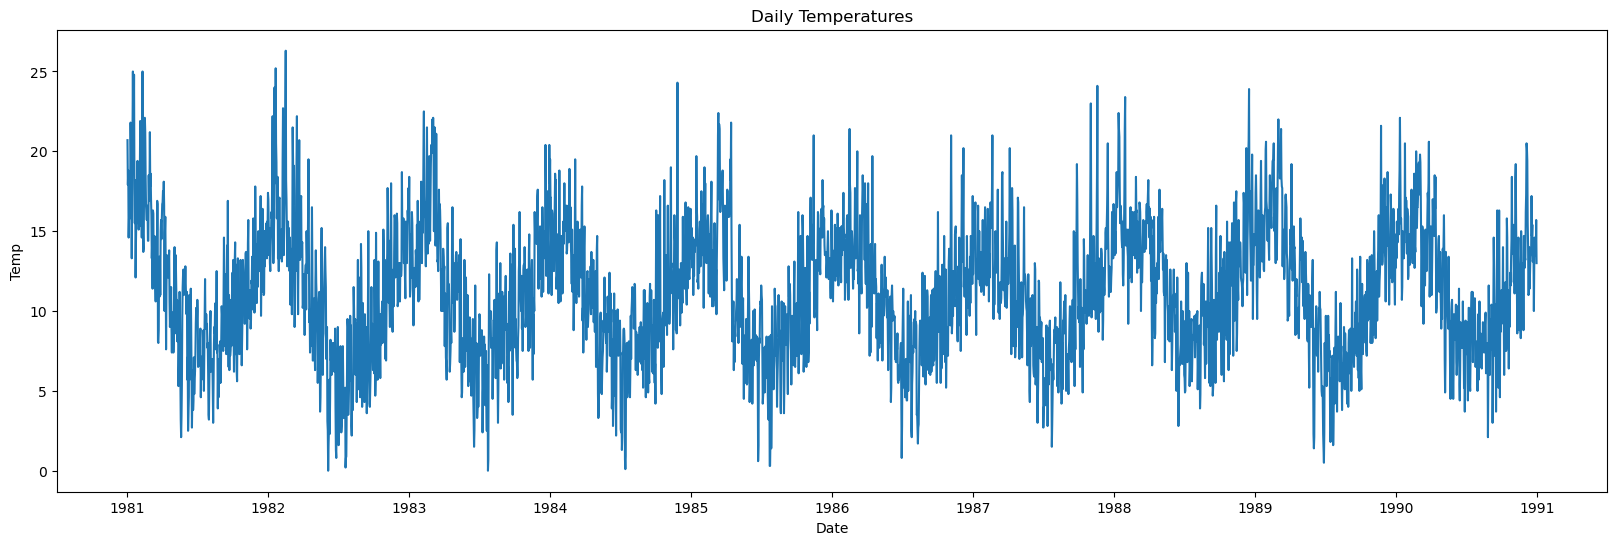

In [3]:
# Plot the time series data
plt.figure(figsize=(20, 6))
plt.plot(df['Temp'])
plt.title('Daily Temperatures')
plt.xlabel('Date')
plt.ylabel('Temp')
plt.show()

In [4]:
# Check stationarity using Augmented Dickey-Fuller test
result = adfuller(df['Temp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.444804924611683
p-value: 0.0002470826300361156


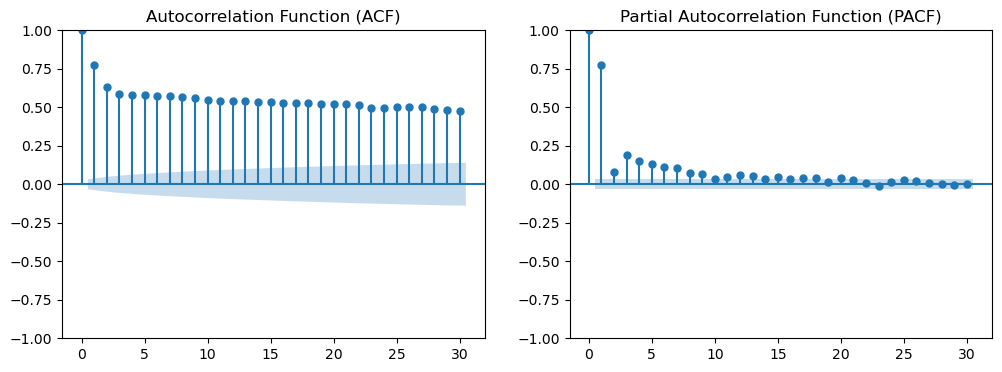

In [5]:
# Plot ACF and PACF to identify the order of AR(p)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(df['Temp'], lags=30, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

plot_pacf(df['Temp'], lags=30, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

In [6]:
# Fit AR(p) model
order_p = 10 # Adjust the order based on the PACF plot
ar_model = AutoReg(df['Temp'], lags=order_p)
ar_result = ar_model.fit()

# Print AR coefficients

print('AR Coefficients:')
print(ar_result.params)

AR Coefficients:
const       0.933556
Temp.L1     0.609932
Temp.L2    -0.083221
Temp.L3     0.063253
Temp.L4     0.051203
Temp.L5     0.054796
Temp.L6     0.041632
Temp.L7     0.059827
Temp.L8     0.032220
Temp.L9     0.050027
Temp.L10    0.036349
dtype: float64


### Coefficients of ARMA(p,q) model

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [8]:
# Load the data
df = pd.read_csv('catfish.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

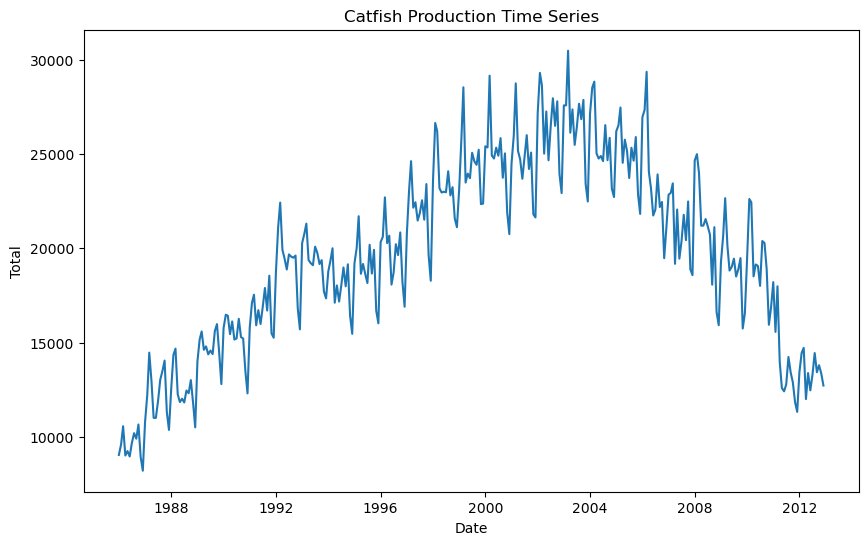

In [9]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['Total'])
plt.title('Catfish Production Time Series')
plt.xlabel('Date')
plt.ylabel('Total')
plt.show()

In [10]:
# Check stationarity using Augmented Dickey-Fuller test
result = adfuller(df['Total'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.5899031233340122
p-value: 0.4886635157188416


In [11]:
first_diff = df.diff()[1:]

In [12]:
# Check stationarity using Augmented Dickey-Fuller test
result = adfuller(first_diff['Total'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.310935282406804
p-value: 0.00042523708517150377


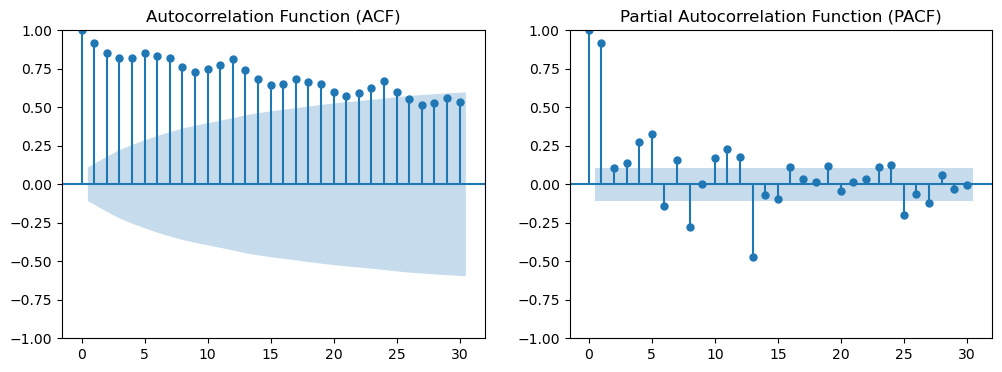

In [13]:
# Plot ACF and PACF to identify the order of AR(p)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(df['Total'], lags=30, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

plot_pacf(df['Total'], lags=30, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

In [14]:
# Fit ARIMA model
order = (5, 0, 5)  # Replace p, d, and q with appropriate values
arma_model = ARIMA(df['Total'], order=order)
arma_result = arma_model.fit()

In [15]:
# Print ARMA coefficients
print('ARMA Coefficients:')
print(arma_result.params)

ARMA Coefficients:
const     1.964398e+04
ar.L1     2.763052e-01
ar.L2     4.640086e-01
ar.L3    -4.810755e-01
ar.L4    -2.446463e-01
ar.L5     9.812941e-01
ma.L1     3.817363e-01
ma.L2    -7.704097e-02
ma.L3     6.885371e-01
ma.L4     7.161643e-01
ma.L5    -3.448779e-01
sigma2    2.283222e+06
dtype: float64
